## Observations and Insights 

In [225]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combined = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
data_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [226]:
# Checking the number of mice.
#total_mice = len(data_combined["Mouse ID"].unique())
#total_mice

total_mice = data_combined["Mouse ID"].value_counts()
total_mice

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [227]:
data_combined.rename(columns={"Tumor Volume (mm3)": "Tumor_volume_mm3", "Weight (g)": "Weight_g"}, inplace = True)
data_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [228]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = pd.DataFrame(data_combined[data_combined.duplicated(["Mouse ID","Timepoint"])])
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_volume_mm3,Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [229]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_combined.drop_duplicates(["Mouse ID"])
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [230]:
clean_df.count()

Mouse ID            249
Drug Regimen        249
Sex                 249
Age_months          249
Weight_g            249
Timepoint           249
Tumor_volume_mm3    249
Metastatic Sites    249
dtype: int64

In [231]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_df["Mouse ID"].unique())
mice_count


249

## Summary Statistics

In [232]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary dataframe.
regimen_grouped = data_combined.groupby(["Drug Regimen"])

mean = regimen_grouped["Tumor_volume_mm3"].mean()
median = regimen_grouped["Tumor_volume_mm3"].median()
variance = regimen_grouped["Tumor_volume_mm3"].var()
stdev = regimen_grouped["Tumor_volume_mm3"].std()
sem = regimen_grouped["Tumor_volume_mm3"].sem()

summary_statistics = pd.DataFrame({
                                "Mean": mean,
                                "Median": median, 
                                "Variance": variance,
                                "Standard Deviation": stdev,
                                "SEM": sem,
})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [233]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
## this wasn't shown in class, here is a link (look at last example):
#https://www.geeksforgeeks.org/how-to-combine-groupby-and-multiple-aggregate-functions-in-pandas/


data_combined.groupby(data_combined["Drug Regimen"]).Tumor_volume_mm3.agg([
                                                                        "mean",
                                                                        "median",
                                                                        "var",
                                                                        "std",
                                                                        "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

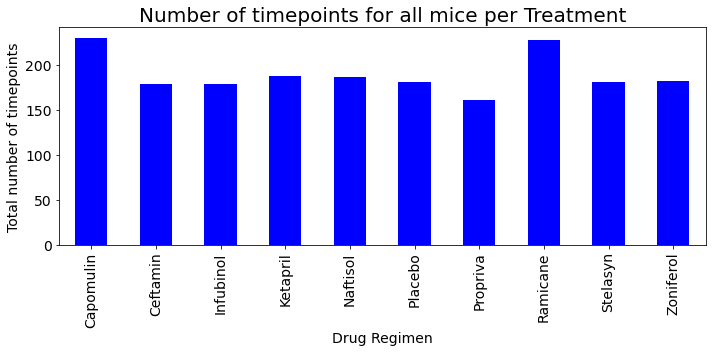

In [234]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_combined = data_combined.groupby(["Drug Regimen"]).count()["Timepoint"]

plot_pandas = timepoint_combined.plot(kind="bar", figsize=(10,5), color='b',fontsize = 14)

plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Total number of timepoints",fontsize = 14)
plt.title("Number of timepoints for all mice per Treatment",fontsize = 20)

plt.tight_layout()
plt.show()



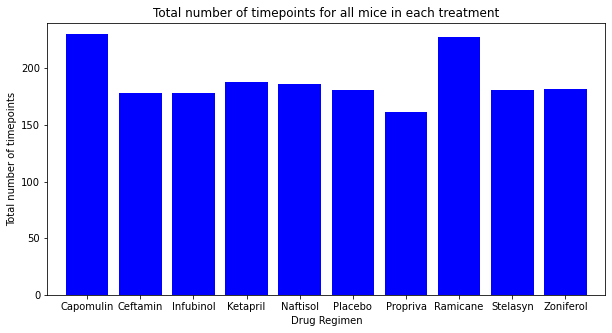

In [235]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(timepoint_combined))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,5))
plt.bar(x_axis, timepoint_combined, color='b', alpha=1, align='center')
plt.xticks(tick_locations, timepoint_combined.index.values)

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(timepoint_combined)+10)

plt.title("Total number of timepoints for all mice in each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of timepoints")
plt.show()

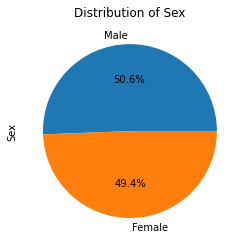

In [236]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data = data_combined["Sex"].value_counts()
gender_data

gender_data.plot.pie(autopct= "%1.1f%%",title="Distribution of Sex")
plt.show()

Text(0.5, 1.0, 'Distribution of Sex')

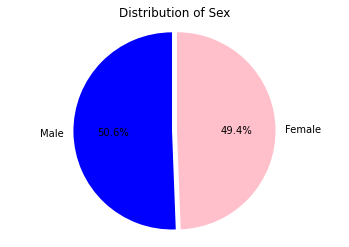

In [237]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["blue", "pink"]
explode = (0.05, 0)

plt.pie(gender_data, explode=explode, labels=gender_data.index.values, colors=colors, autopct="%1.1f%%", startangle=90)
plt.axis("equal")

plt.title("Distribution of Sex")


## Quartiles, Outliers and Boxplots

In [238]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = data_combined.groupby(["Mouse ID"])["Timepoint"].max()
print(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_point_df = pd.merge(last_timepoint, data_combined, on=(["Mouse ID", "Timepoint"]))
last_point_df


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight_g,Tumor_volume_mm3,Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [239]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
    #add a subset
    
for treat in treatments:
    drug_regimen = last_point_df.loc[last_point_df["Drug Regimen"] == treat]
    tumor_volume = drug_regimen["Tumor_volume_mm3"]
    
    tumor_vol_data.append(tumor_volume)

quartile_zero = tumor_vol_data[0].quantile([.25,.5,.75])
lower_q_zero = quartile_zero[0.25]
upper_q_zero = quartile_zero[0.75]
IQR0 = upper_q_zero-lower_q_zero

quartile_one = tumor_vol_data[1].quantile([.25,.5,.75])
lower_q_one = quartile_one[0.25]
upper_q_one = quartile_one[0.75]
IQR1 = upper_q_one-lower_q_one

quartile_two = tumor_vol_data[2].quantile([.25,.5,.75])
lower_q_two = quartile_two[0.25]
upper_q_two = quartile_two[0.75]
IQR2 = upper_q_two-lower_q_two

quartile_three = tumor_vol_data[3].quantile([.25,.5,.75])
lower_q_three = quartile_three[0.25]
upper_q_three = quartile_three[0.75]
IQR3 = upper_q_three-lower_q_three


# Determine outliers using upper and lower bounds
lower_bound_zero = lower_q_zero - (1.5*IQR0)
upper_bound_zero= upper_q_zero + (1.5*IQR0)

lower_bound_one = lower_q_one - (1.5*IQR1)
upper_bound_one = upper_q_one + (1.5*IQR1)

lower_bound_two = lower_q_two - (1.5*IQR2)
upper_bound_two = upper_q_two + (1.5*IQR2)

lower_bound_three = lower_q_three - (1.5*IQR3)
upper_bound_three = upper_q_three + (1.5*IQR3)

In [240]:
print(f"The following are for {treatments[0]}:")
print(f"The lower quartile is: {lower_q_zero}")
print(f"The upper quartile is: {upper_q_zero}")
print(f"The interquartile range is: {IQR0}")
print(f"The median is: {quartile_zero[0.5]} ")
print("----------------------------------------")
print(f"The following are for {treatments[1]}:")
print(f"The lower quartile is: {lower_q_one}")
print(f"The upper quartile is: {upper_q_one}")
print(f"The interquartile range is: {IQR1}")
print(f"The median is: {quartile_one[0.5]} ")
print("----------------------------------------")
print(f"The following are for {treatments[2]}:")
print(f"The lower quartile is: {lower_q_two}")
print(f"The upper quartile is: {upper_q_two}")
print(f"The interquartile range is: {IQR2}")
print(f"The median is: {quartile_two[0.5]} ")
print("----------------------------------------")
print(f"The following are for {treatments[3]}:")
print(f"The lower quartile is: {lower_q_three}")
print(f"The upper quartile is: {upper_q_three}")
print(f"The interquartile range is: {IQR3}")
print(f"The median is: {quartile_three[0.5]} ")

The following are for Capomulin:
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The median is: 38.1251644 
----------------------------------------
The following are for Ramicane:
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The median is: 36.56165229 
----------------------------------------
The following are for Infubinol:
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The median is: 60.16518046 
----------------------------------------
The following are for Ceftamin:
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The median is: 59.85195552 


In [241]:
#Print outlier values per drug regimen
print(f"For the drug '{treatments[0]}', values that are below {lower_bound_zero} and above {upper_bound_zero} could be outliers")
print("----------------------------------------")
print(f"For the drug '{treatments[1]}', values that are below {lower_bound_one} and above {upper_bound_one} could be outliers")
print("----------------------------------------")
print(f"For the drug '{treatments[2]}', values that are below {lower_bound_two} and above {upper_bound_two} could be outliers")
print("----------------------------------------")
print(f"For the drug '{treatments[3]}', values that are below {lower_bound_three} and above {upper_bound_three} could be outliers")

For the drug 'Capomulin', values that are below 20.70456164999999 and above 51.83201549 could be outliers
----------------------------------------
For the drug 'Ramicane', values that are below 17.912664470000003 and above 54.30681135 could be outliers
----------------------------------------
For the drug 'Infubinol', values that are below 36.83290494999999 and above 82.74144559000001 could be outliers
----------------------------------------
For the drug 'Ceftamin', values that are below 25.355449580000002 and above 87.66645829999999 could be outliers


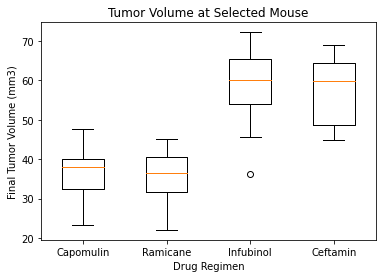

In [242]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Regimen = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_vol_data, labels=Regimen, widths = .5, vert=True)
plt.show()

## Line and Scatter Plots

In [243]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_treatment = data_combined.loc[data_combined["Drug Regimen"] == "Capomulin"]
cap_treatment.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [244]:
mouse_r554 = data_combined.loc[data_combined["Mouse ID"] == "r554"]

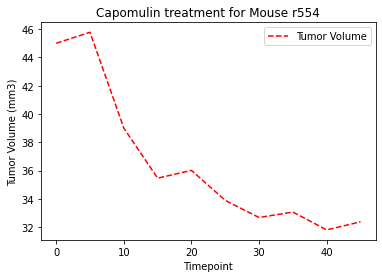

In [245]:
#Create variables, title and labels to plot 
Timep_x = mouse_r554["Timepoint"]
Tumor_Vol_y = mouse_r554["Tumor_volume_mm3"]

plt.plot(Timep_x, Tumor_Vol_y, color="red", label="Tumor Volume", linestyle="dashed" )

plt.title("Capomulin treatment for Mouse r554")
plt.xlabel("Timepoint")
plt.xticks(np.arange(min(Timep_x), max(Timep_x)+1, 10))
plt.ylabel("Tumor Volume (mm3)")

plt.legend(loc="best")
plt.show()

Text(0, 0.5, 'Tumor volume (mm3)')

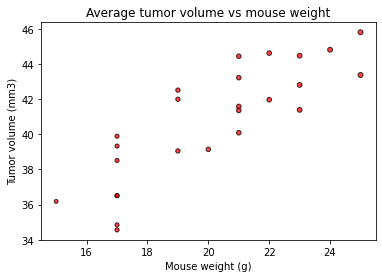

In [246]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_df = cap_treatment.groupby(["Mouse ID"]).mean()
capo_df.head()

avg_weight = capo_df["Weight_g"]
avg_volume = capo_df["Tumor_volume_mm3"]

#Plot variables, title, labels
plt.scatter(avg_weight,avg_volume, marker="o",facecolors="red", edgecolors="black",
            s=avg_weight, alpha=0.75)
plt.title("Average tumor volume vs mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")


## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723


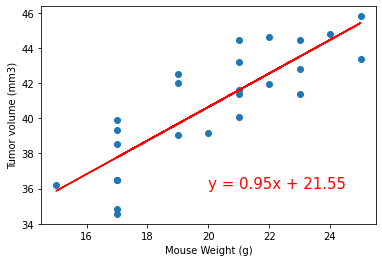

In [260]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_volume,avg_weight)
print(f"The correlation between average tumor volume and weight for Capomulin regimen is {round(correlation[0],2)}")

x_values = capo_df["Weight_g"]
y_values = capo_df["Tumor_volume_mm3"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()
